### Task 2
## Responsible AI
Understanding how AI leads to better decisions

Notebook created by: Minh Tran

Date: 07/06/2021

#### Introduction

This notebook uses a banking dataset and creates a classification algorithm to predict future potential clients who are more likely to subscribe to their term deposits. The goal of the algorithm is to assist management on deliver better business decisions. 

The dataset has 41,188 instances with 20 different attributes and is labeled 'yes' or 'no'. This notebook will perform prediction using classification algorithms such as Logistic Regression or Random Forest. Then this notebook evaluates the prediction results with accuracy, precision, and recall metrics. Feature selection with the Chi-Squared test will be applied to tweak prediction performance.


In [1]:
# import libraries
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [2]:
# create support functions to prepare data
def load_dataset(file):
    '''
    function reads input data and return array of attributes and label
    '''
    data = read_csv(file, sep=";")
    # create numpy array
    dataset = data.values
    # separate predictors and labels
    X = dataset[:, :-1]
    y = dataset[:, -1]
    # format all field as string
    X = X.astype(str)
    return X, y

def encode_attr(X, X_train, X_test):
    '''
    function encodes categorical data into numerical data
    '''
    oe = OrdinalEncoder()
    oe.fit(X)
    X_train_ecd = oe.transform(X_train)
    X_test_ecd = oe.transform(X_test)
    return X_train_ecd, X_test_ecd

def encode_lab(y_train, y_test):
    '''
    function encodes categorical data into numerical data
    '''
    le = LabelEncoder()
    le.fit(y_train)
    y_train_ecd = le.transform(y_train)
    y_test_ecd = le.transform(y_test)
    return y_train_ecd, y_test_ecd   
    

In [3]:
# load input data
X, y = load_dataset("bank-additional-full.csv")
# split train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
# prepare the data
X_train_ecd, X_test_ecd = encode_attr(X, X_train, X_test)
y_train_ecd, y_test_ecd = encode_lab(y_train, y_test)

### Make prediction using all of the features

In [4]:
# fit the model using Logistic Regression
model = LogisticRegression(solver='lbfgs', max_iter=5000)
model.fit(X_train_ecd, y_train_ecd)
# make prediction
y_pred = model.predict(X_test_ecd)
# test model accuracy
accuracy = accuracy_score(y_test_ecd, y_pred)
print("Logistic Regression") 
print("Accuracy: " + str(accuracy*100))
precision = precision_score(y_test_ecd, y_pred)
print("Precission: " + str(precision*100))
recall = recall_score(y_test_ecd, y_pred)
print("Recall: " + str(recall*100))

Logistic Regression
Accuracy: 89.30565671279437
Precission: 67.94871794871796
Recall: 21.34944612286002


In [5]:
# fit the model using Random Forest Classifier
classifier = RandomForestClassifier(n_estimators = 10, 
                                    criterion='entropy', 
                                    random_state=0)
classifier.fit(X_train_ecd, y_train_ecd)

# make prediction
y_pred = classifier.predict(X_test_ecd)

# test model accuracy
accuracy = accuracy_score(y_test_ecd, y_pred)

print("Random Forest Classifier")
print("Accuracy: " + str(accuracy*100))
precision = precision_score(y_test_ecd, y_pred)
print("Precission: " + str(precision*100))
recall = recall_score(y_test_ecd, y_pred)
print("Recall: " + str(recall*100))

Random Forest Classifier
Accuracy: 89.29351784413693
Precission: 62.091503267973856
Recall: 28.700906344410875


While making predictions using all of the features, I can see that between Logistic Regression and Random Forest Classifier, they have close accuracy but the latter has a better recall, so I will choose Random Forest Classifier as the main classifier.

### Feature selection

After making prediction using all of the available features, I use Chi Square test the select the best feature. Then I make prediction again using the top features and see if the accuracy is improve.

In [6]:
# import feature selection libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot as plt

In [7]:
def feature_selection(X_train, y_train, X_test, k="all"):
    fs = SelectKBest(score_func=chi2, k=k)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [8]:
# perform feature selection with all of the feature
X_train_fs, X_test_fs, fs = feature_selection(X_train_ecd, y_train_ecd, X_test_ecd)

In [9]:
# get chi-squared score
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 147.478467
Feature 1: 94.504290
Feature 2: 25.476164
Feature 3: 117.304044
Feature 4: 266.032542
Feature 5: 4.805618
Feature 6: 0.258374
Feature 7: 436.668807
Feature 8: 0.364777
Feature 9: 12.814467
Feature 10: 35052.424434
Feature 11: 1486.917244
Feature 12: 311.234649
Feature 13: 2346.556207
Feature 14: 85.361107
Feature 15: 984.368219
Feature 16: 1387.738807
Feature 17: 406.518728
Feature 18: 83008.857129
Feature 19: 3208.806943


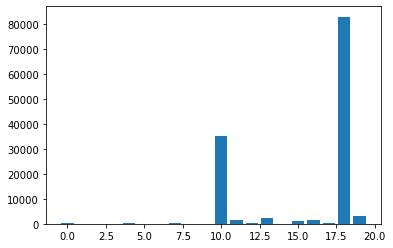

In [10]:
# visualize the score results
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

I can see that feature 18, 10, 19, 13, and 11 are the top 5 features which have the highest Chi-Squared score. They are euribor3m, duration, nr.employed, previous, and campaign respectively.

In [11]:
# make prediction again with feature selection
# feature selection 
X_train_fs, X_test_fs, fs = feature_selection(X_train_ecd, 
                                              y_train_ecd, 
                                              X_test_ecd, 5)

# fit the model
classifier.fit(X_train_fs, y_train_ecd)
# make prediction
yhat = classifier.predict(X_test_fs)

# evaluation metrics
accuracy = accuracy_score(y_test_ecd, yhat)
print("Accuracy: " + str(accuracy*100))
precision = precision_score(y_test_ecd, yhat)
print("Precission: " + str(precision*100))
recall = recall_score(y_test_ecd, yhat)
print("Recall: " + str(recall*100))

# confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test_ecd, yhat).ravel()
(TN, FP, FN, TP)

Accuracy: 87.86113134255888
Precission: 49.395509499136445
Recall: 28.80161127895267


(6952, 293, 707, 286)

While choosing the top 5 features based on the Chi-Squared score, my model performance reduces slightly. So besides the top contributed features, the other features still indeed contribute to the model, just less than the top 5. While the model accuracy is considerably high, this is because the model would predict correctly the clients who WON'T subscribe. While in this case, recall might be the most important evaluation metric to find the most clients who are more likely to subscribe. By using feature selection, the model accuracy has reduced however, the model recall has increased slightly due to less noise.

#### Conclusion
The management can use this classification model to predict the next future clients who are not likely to subscribe to the term deposits to save resources and find other clients. 

Due to short time, this notebook has not covered data-wrangling in-depth, such as data audit, impute missing (unknown value), and outlier detection. To get a higher recall score, I might need to use other classification algorithms and spend more time on exploratory data analysis and data processing, feature selection.
